In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/car data.csv")
df.shape

(301, 9)

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df.drop_duplicates(inplace=True)

**EDA**


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


Text(0.5, 1.0, 'Car Age: ')

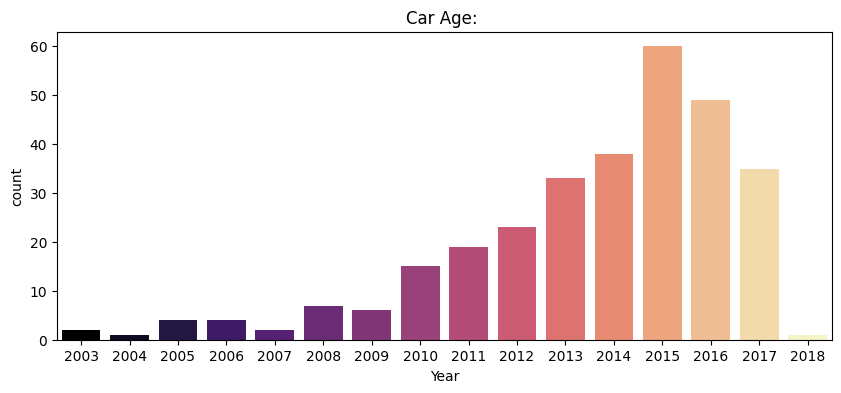

In [ ]:
plt.figure(figsize=(10,4))

sns.countplot(x='Year',data=df, palette='magma',hue='Year',legend=False).set_title('Car Age: ')

Text(0.5, 1.0, 'Top 10 Selling Cars')

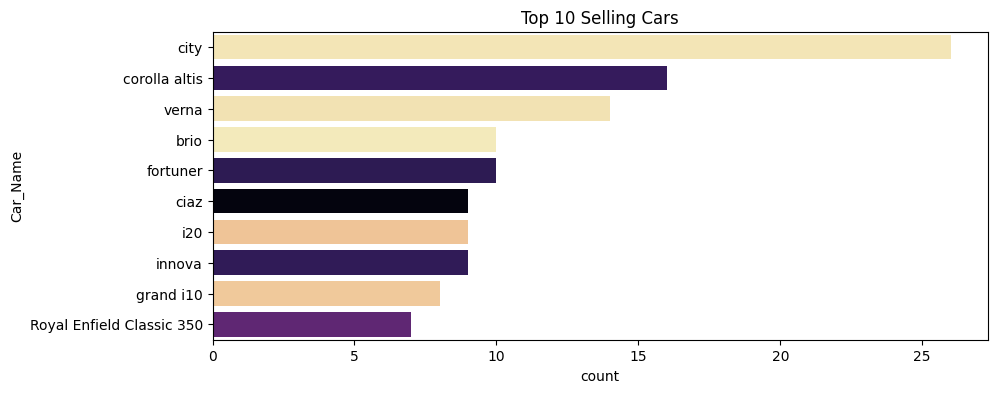

In [ ]:
plt.figure(figsize=(10,4))
top_car = df['Car_Name'].value_counts().nlargest(10)
sns.countplot(y=df.Car_Name, order=top_car.index, hue=df.Car_Name, palette='magma',legend=False).set_title('Top 10 Selling Cars')

Text(0.5, 1.0, 'Variation of selling price with Age of Car')

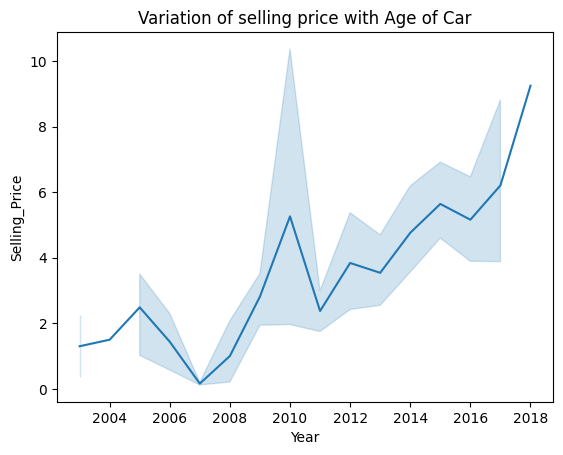

In [ ]:
sns.lineplot(x='Year', y='Selling_Price', data=df).set_title('Variation of selling price with Age of Car')

In [ ]:
# Percentage distribution of categorical features
fuel_type = df['Fuel_Type'].value_counts(normalize=True) * 100
owner_count = df['Owner'].value_counts(normalize=True) * 100
selling_type = df['Selling_type'].value_counts(normalize=True) * 100
transmission = df['Transmission'].value_counts(normalize=True) * 100

# Display results
print("Fuel Type Distribution (%):\n", fuel_type, "\n")
print("Owner Count Distribution (%):\n", owner_count, "\n")
print("Selling Type Distribution (%):\n", selling_type, "\n")
print("Transmission Type Distribution (%):\n", transmission)


Fuel Type Distribution (%):
 Fuel_Type
Petrol    79.933110
Diesel    19.397993
CNG        0.668896
Name: proportion, dtype: float64 

Owner Count Distribution (%):
 Owner
0    96.321070
1     3.344482
3     0.334448
Name: proportion, dtype: float64 

Selling Type Distribution (%):
 Selling_type
Dealer        64.548495
Individual    35.451505
Name: proportion, dtype: float64 

Transmission Type Distribution (%):
 Transmission
Manual       86.956522
Automatic    13.043478
Name: proportion, dtype: float64


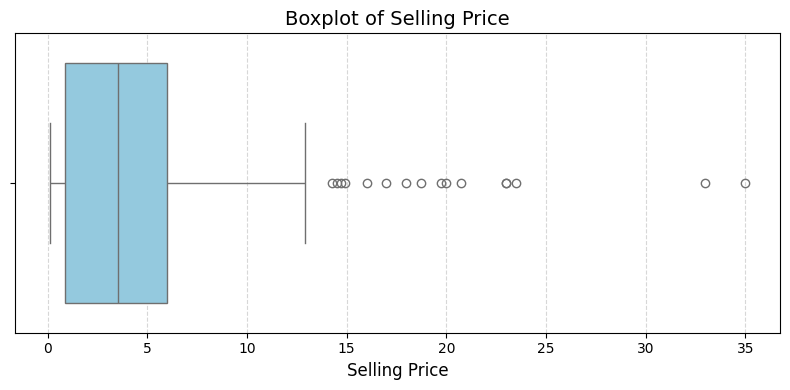

In [ ]:
plt.figure(figsize=(8, 4))  # Slightly wider for better view
sns.boxplot(x='Selling_Price', data=df, color='skyblue')  # Cleaner syntax and color
plt.title('Boxplot of Selling Price', fontsize=14)
plt.xlabel('Selling Price', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure no missing values interfere with percentile calculation
selling_price_clean = df['Selling_Price'].dropna()

# Calculate 75th percentile
percentile_75 = np.percentile(selling_price_clean, 75)

# Count how many values are above the 75th percentile
count_above_75 = (selling_price_clean > percentile_75).sum()

print(f"75th Percentile of Selling Price: {percentile_75}")
print(f"Number of Cars Priced Above 75th Percentile: {count_above_75}")


75th Percentile of Selling Price: 6.0
Number of Cars Priced Above 75th Percentile: 72


<ipython-input-47-7b10668bdb87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Fuel_Type', y='Selling_Price', inner='box', palette='Set2')


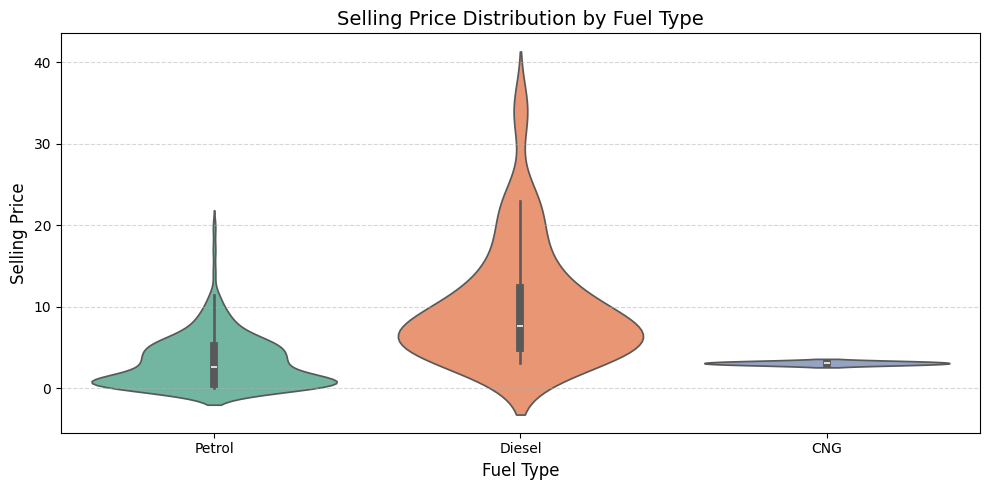

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Fuel_Type', y='Selling_Price', inner='box', palette='Set2')

plt.title('Selling Price Distribution by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


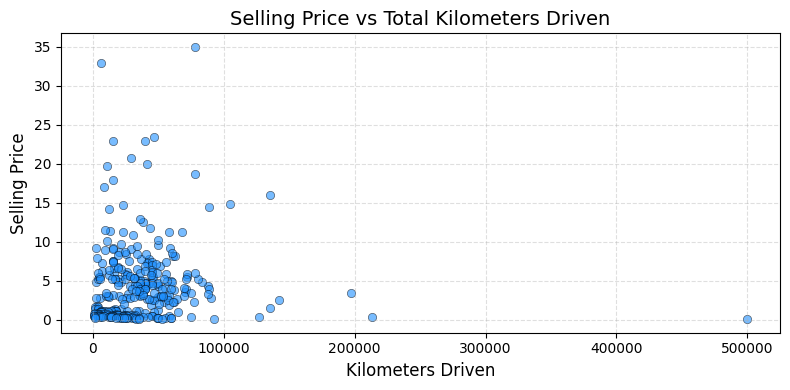

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price', color='dodgerblue', alpha=0.6, edgecolor='k')

plt.title('Selling Price vs Total Kilometers Driven', fontsize=14)
plt.xlabel('Kilometers Driven', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


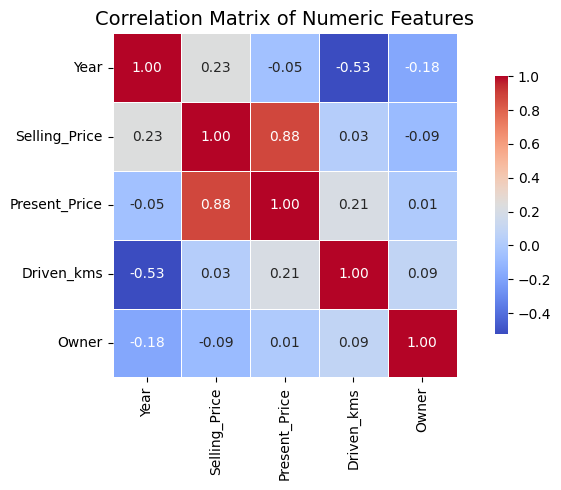

In [ ]:
numeric_cols = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']]

plt.figure(figsize=(8, 5))
sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    fmt=".2f",  # format numbers to 2 decimals
    cmap='coolwarm',
    linewidths=0.5,  # lines between cells for clarity
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.75}  # smaller colorbar
)

plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()
